In [1]:
# %%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list


Toggle code

2023-11-29 19:52:00,418 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 
var_type (463, 14)


In [2]:
dataset_name = "W24_only"
BES_Panel = pd.read_stata(BES_data_folder+dataset_name+os.sep+"BES2019_W24_v25.0.dta")

In [3]:
#### get factors - PCA/FA

In [4]:
BES_num = pd.get_dummies(BES_Panel)
BES_num = BES_num[BES_Panel["country"]=="England"]
drop_cols = ['id','wt']
# BES_num.sum().sort_values()[BES_num.sum().sort_values()<200].hist(bins=200)
drop_cols.extend(list(BES_num.sum()[BES_num.sum()<=20].index))
BES_num = BES_num.select_dtypes('number').drop(drop_cols,axis=1) # drop start/finish datetime columns
BES_num = BES_num.fillna(BES_num.mean())

Wall time: 2.52 s


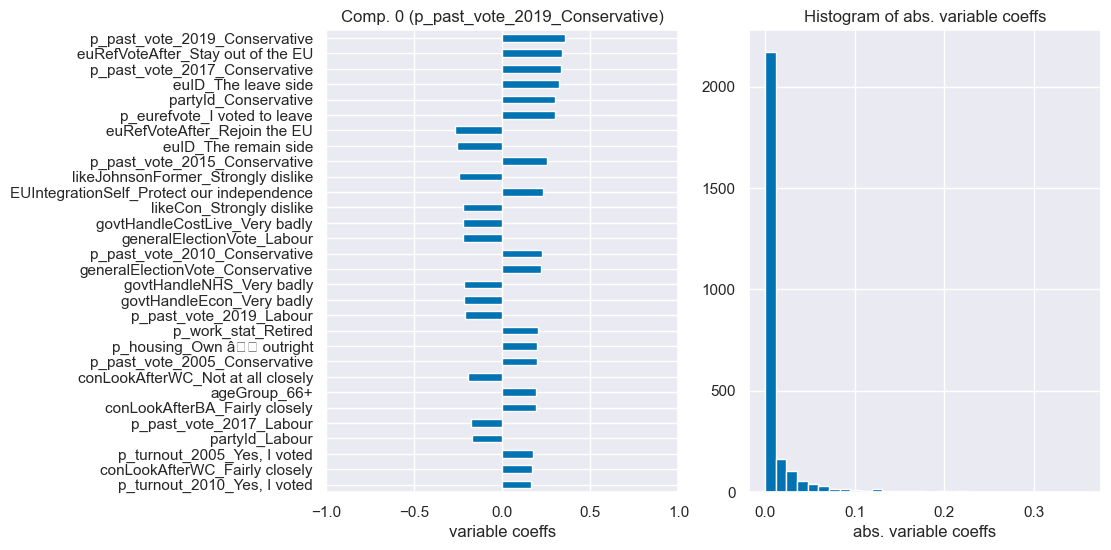

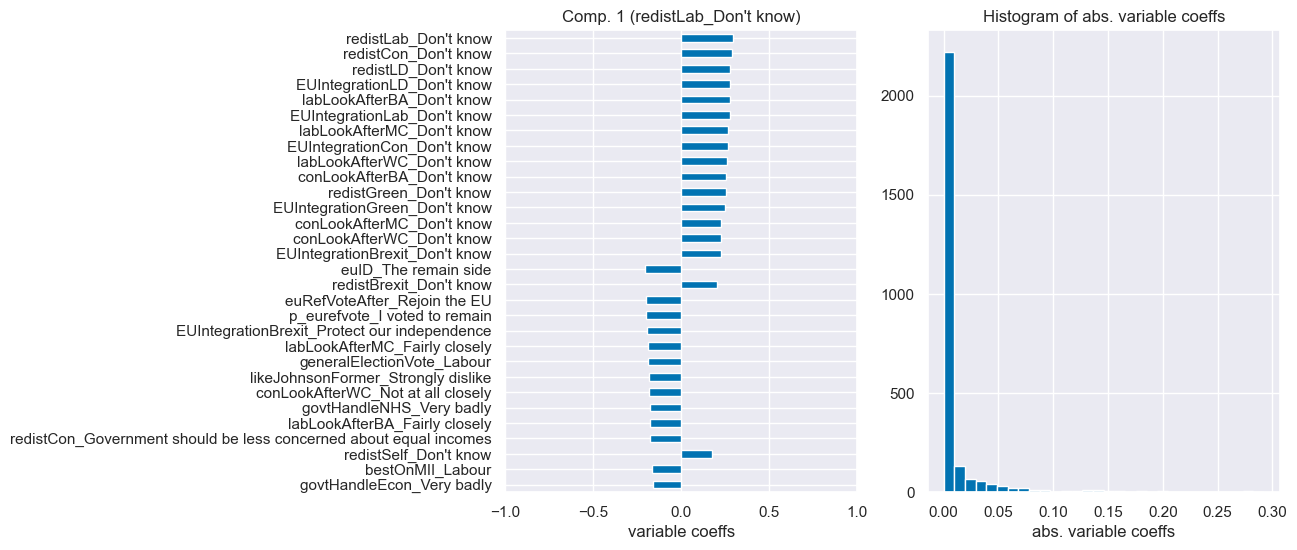

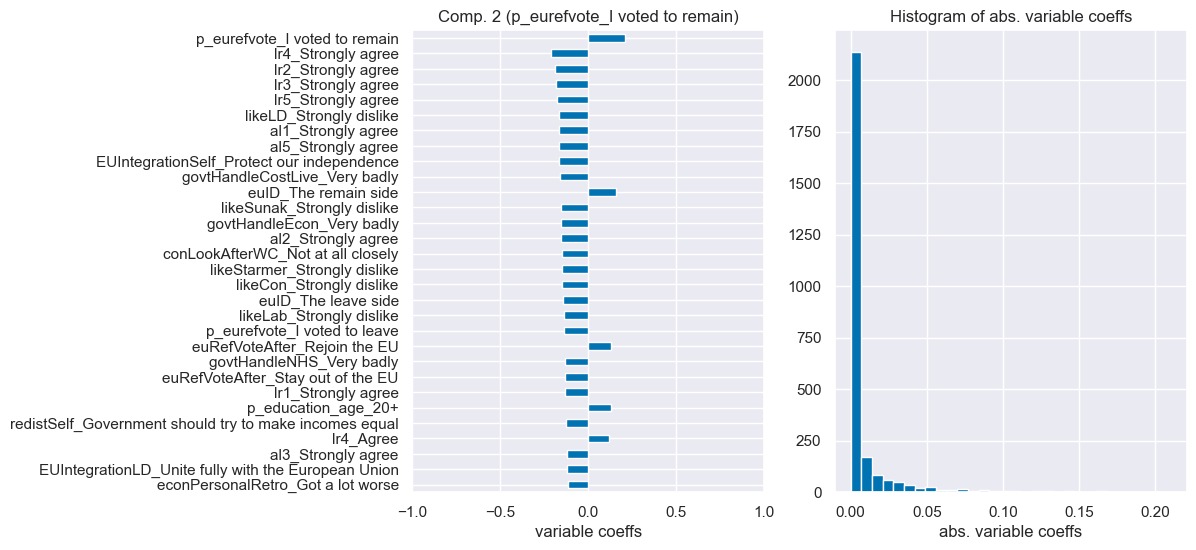

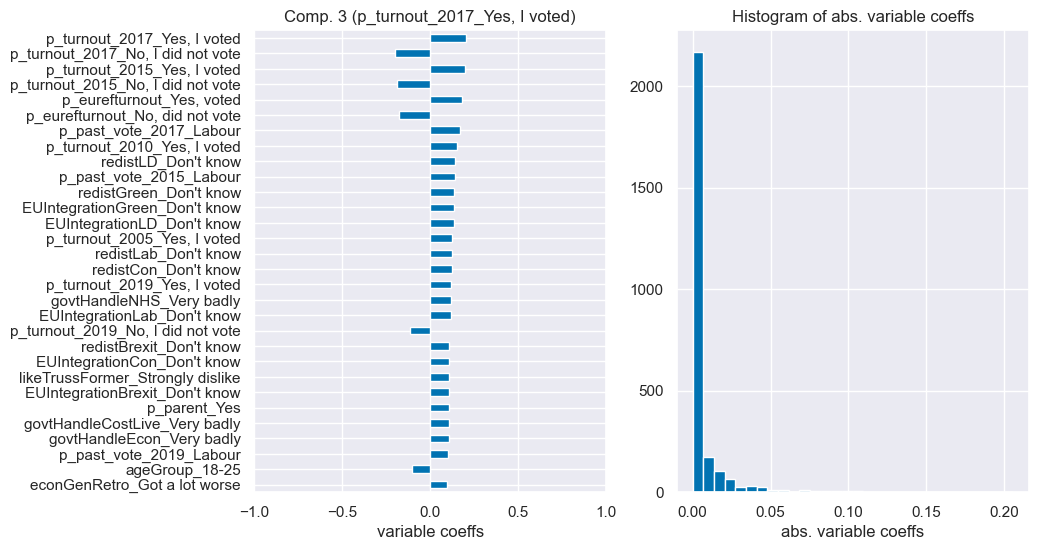

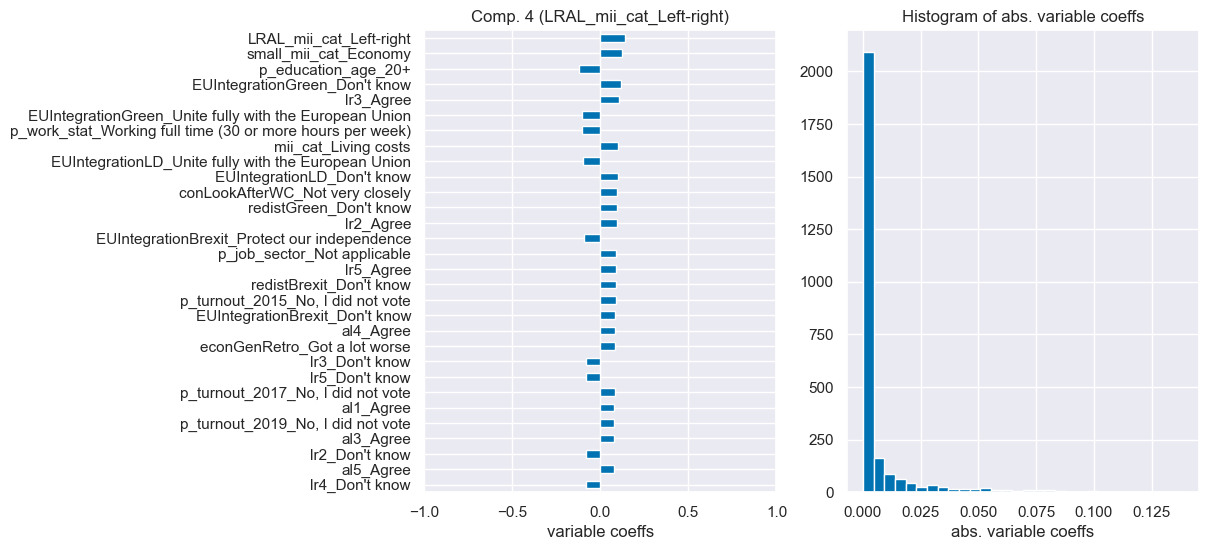

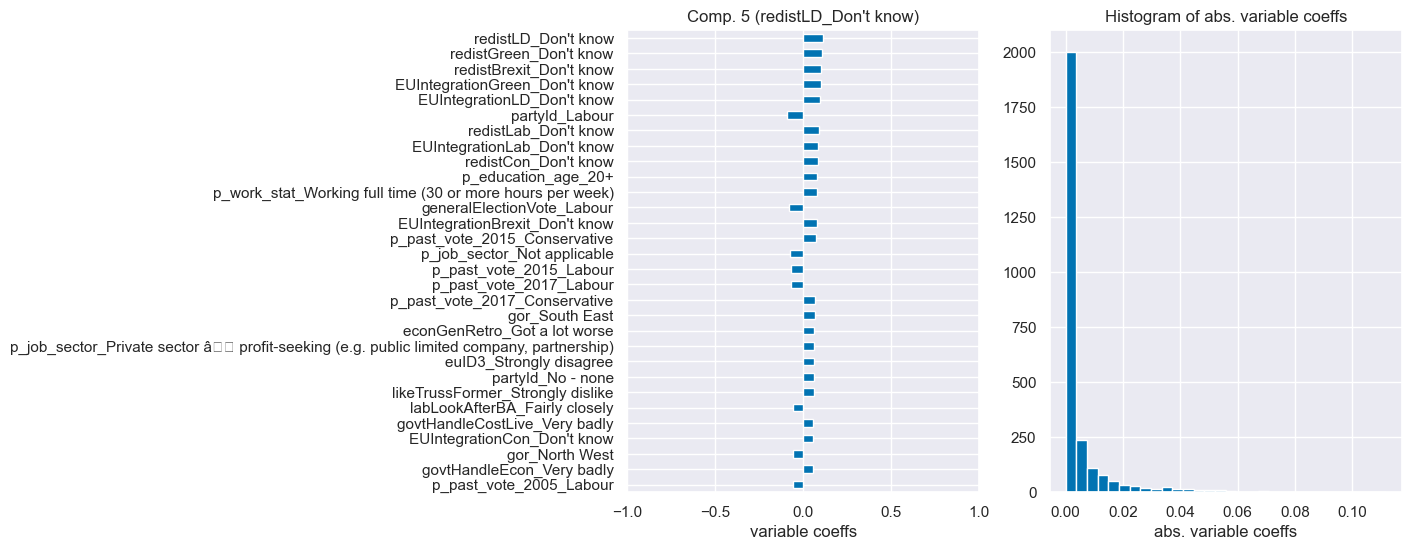

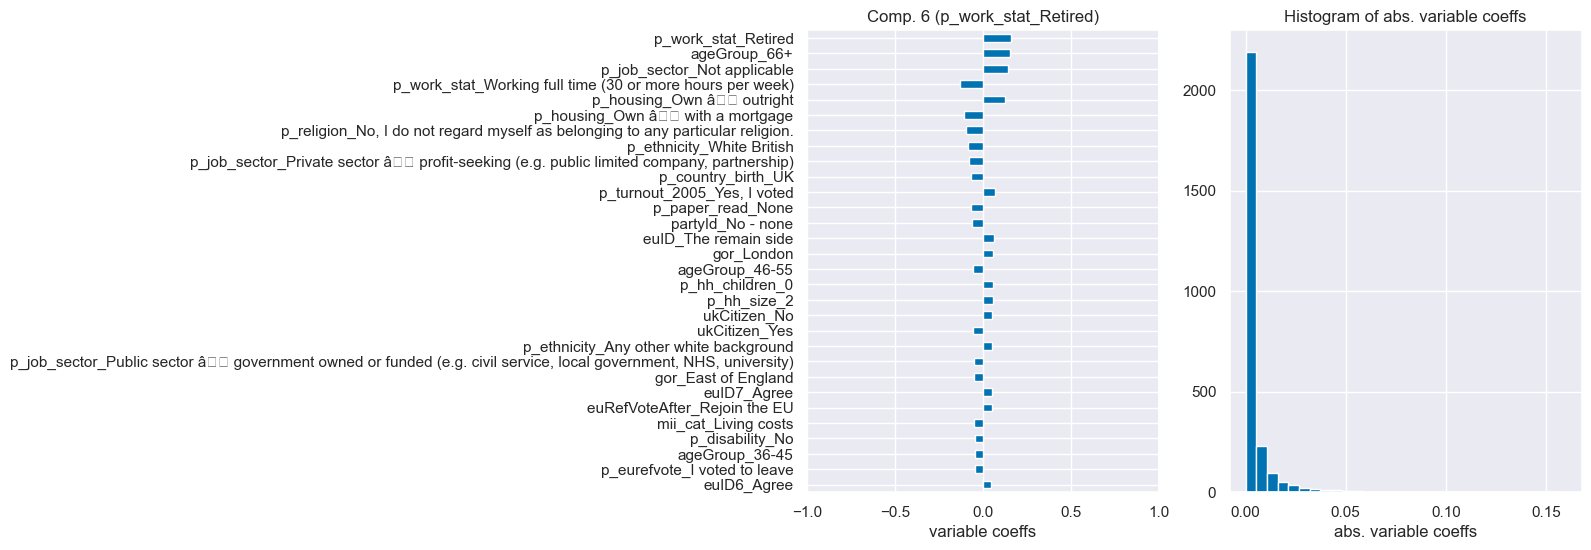

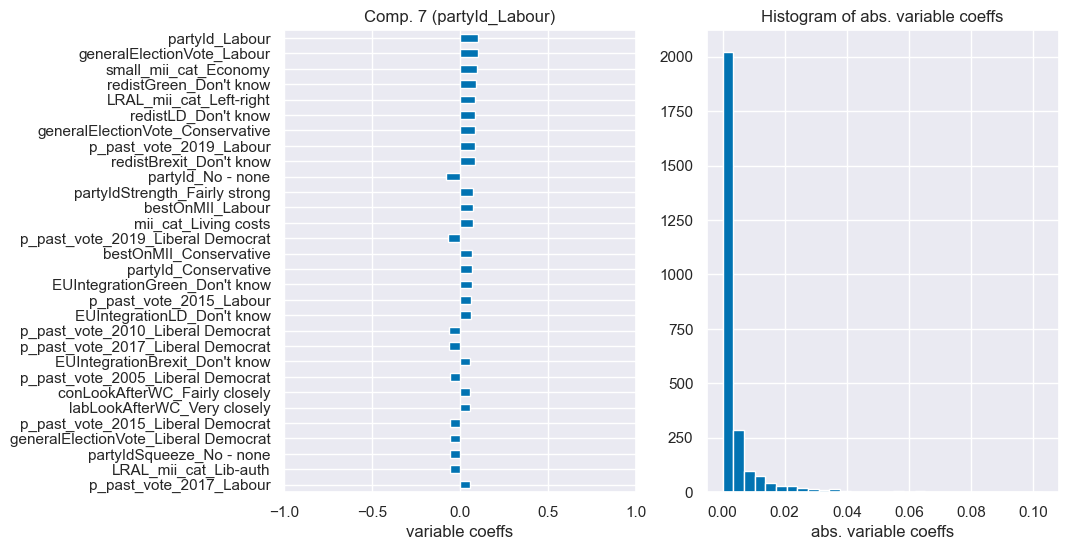

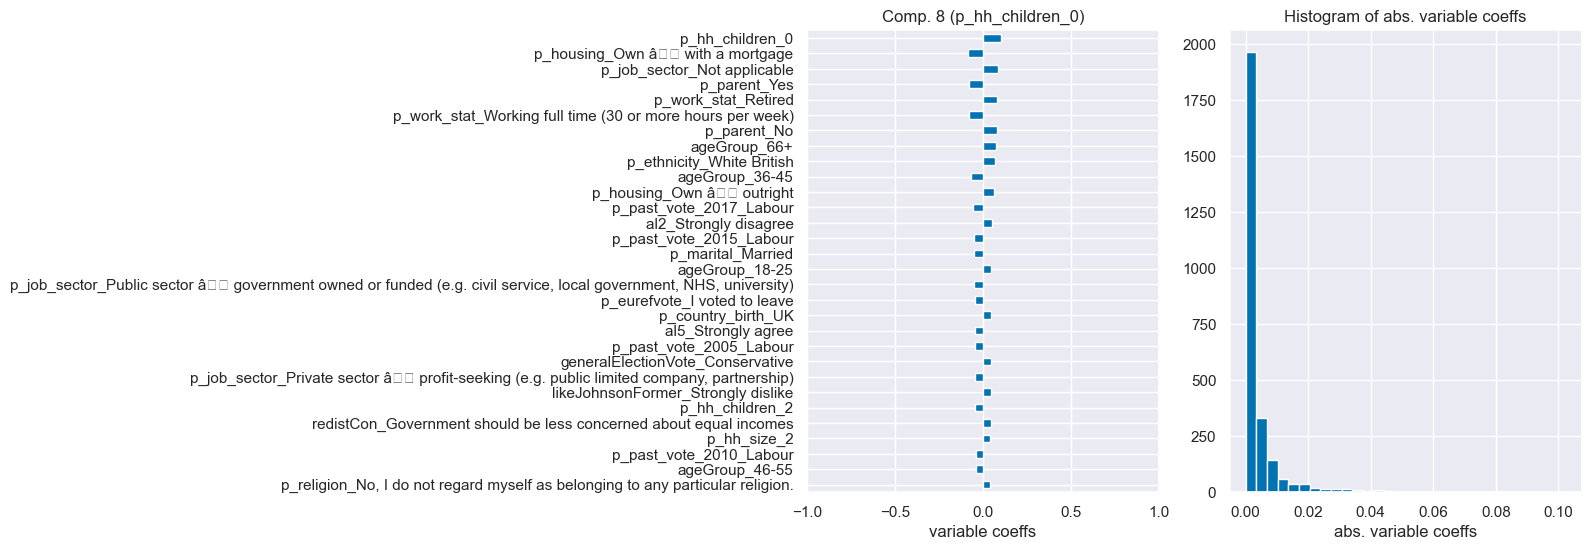

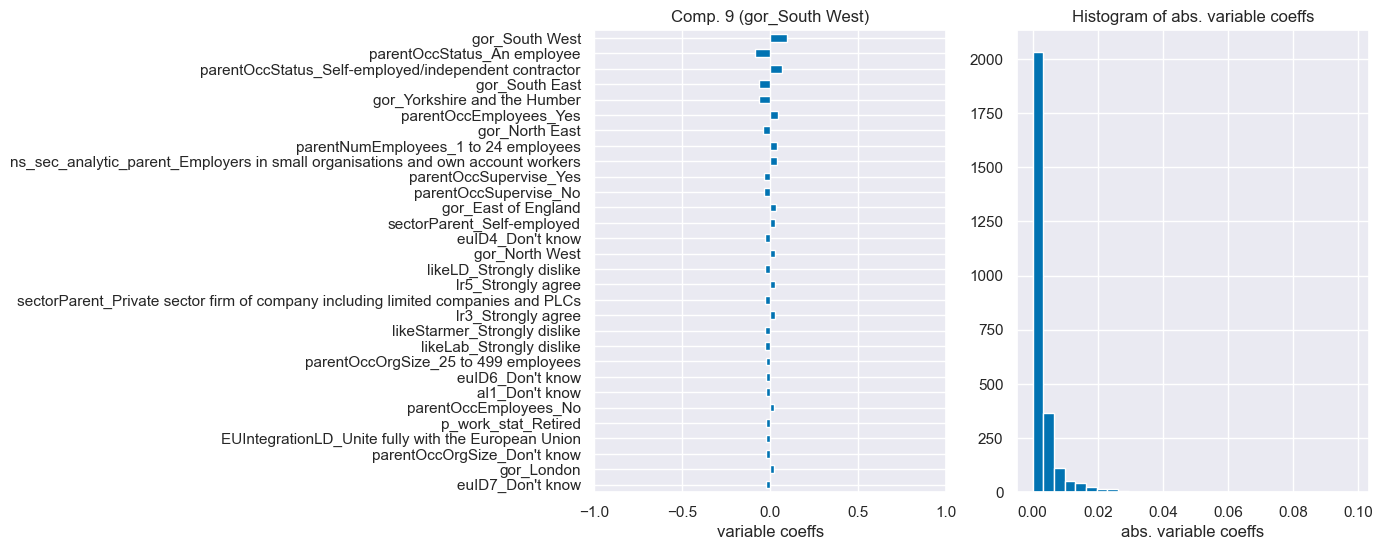

In [5]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

Wall time: 5.21 s


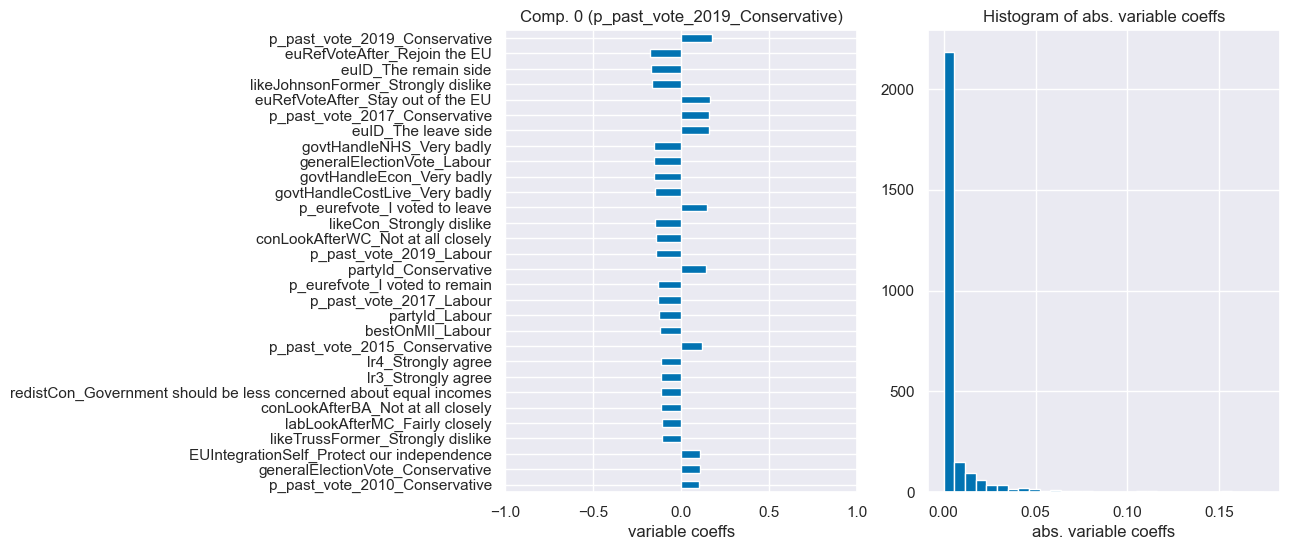

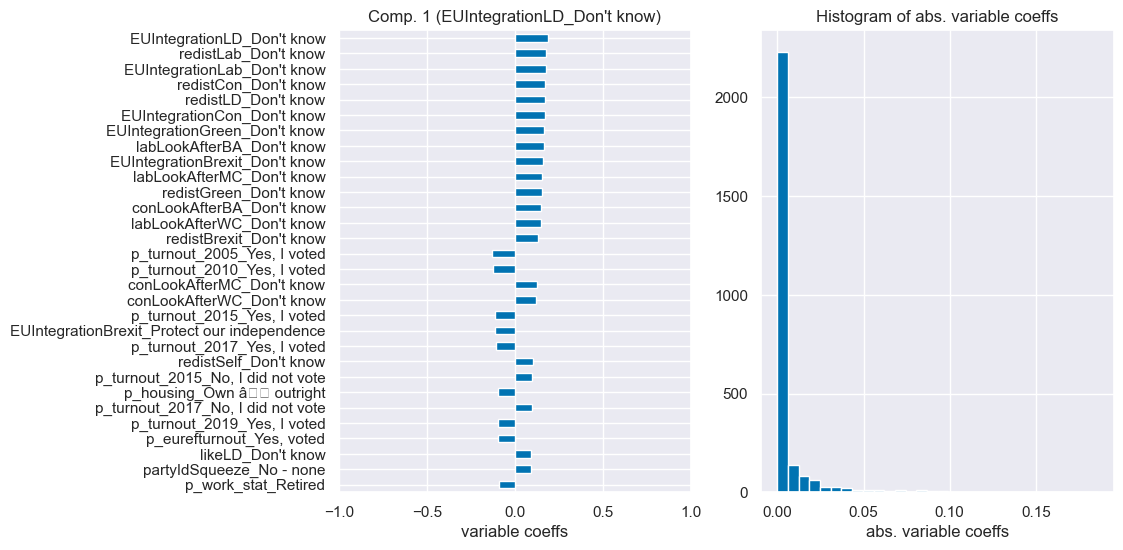

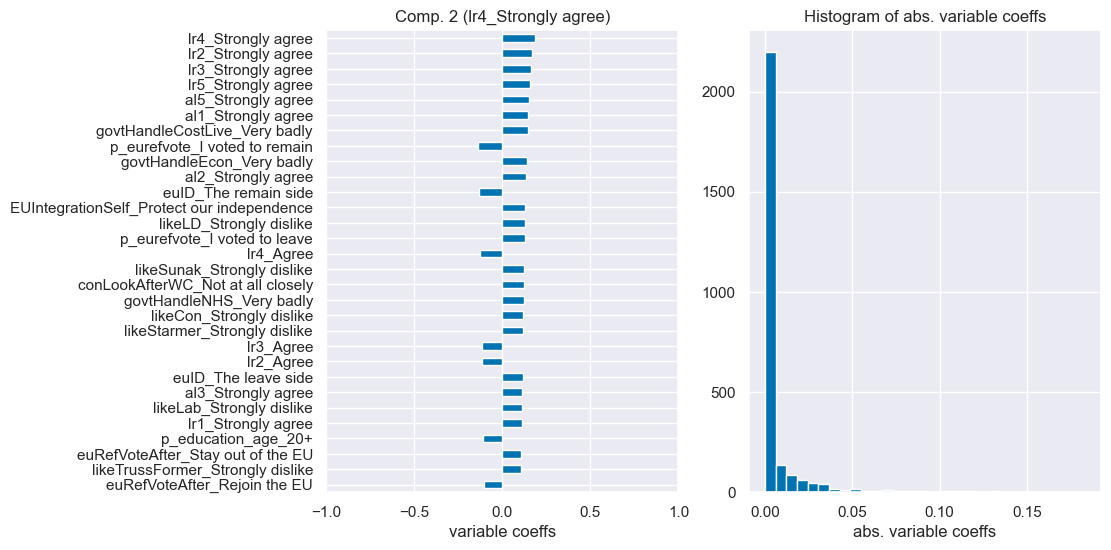

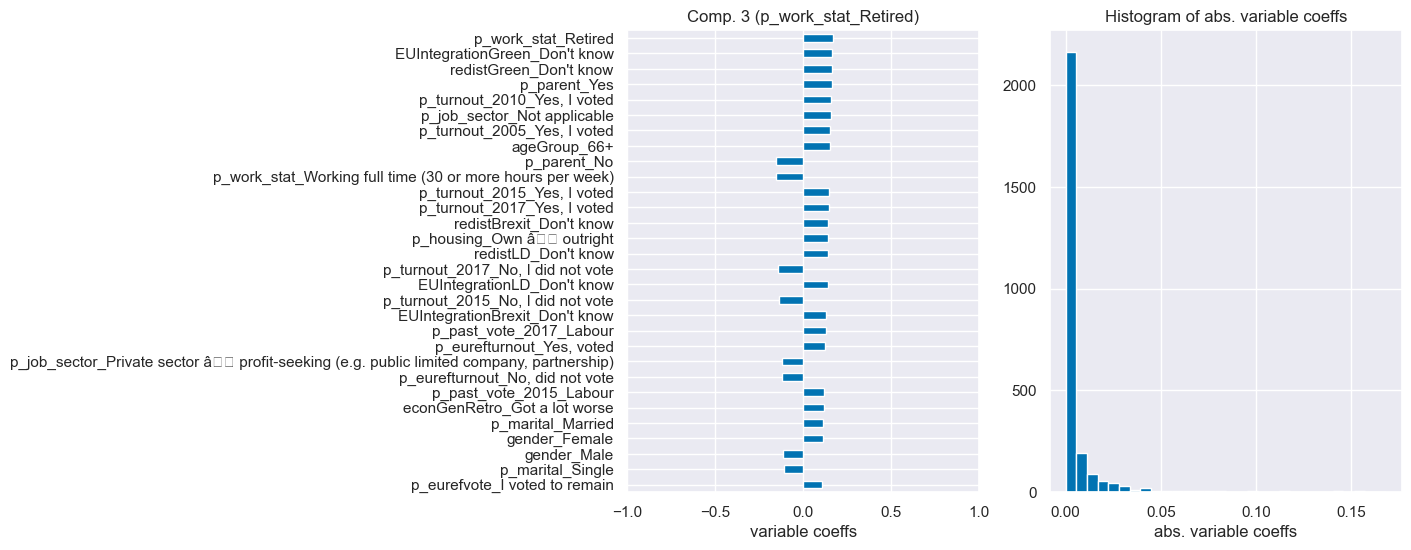

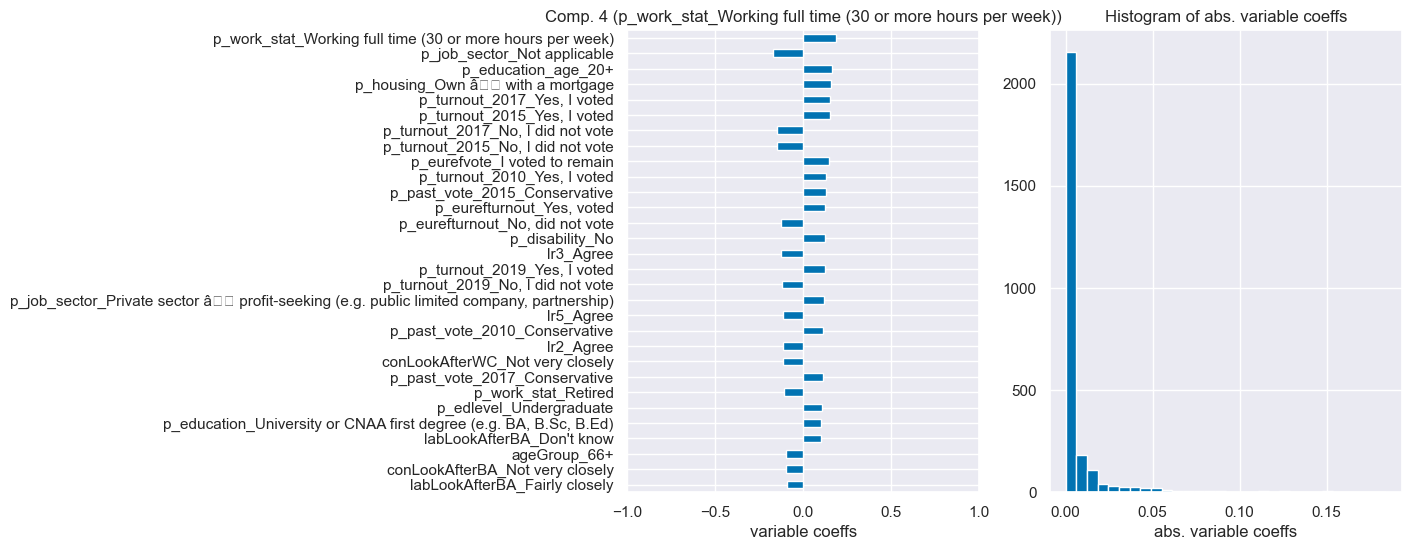

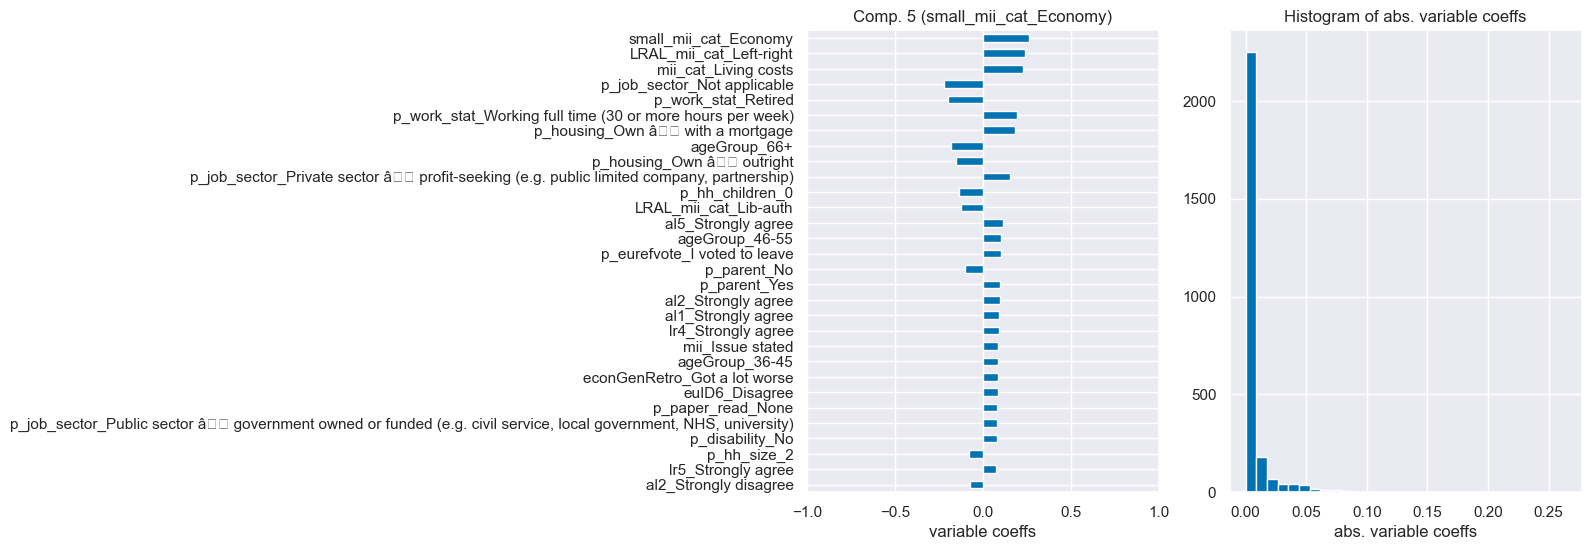

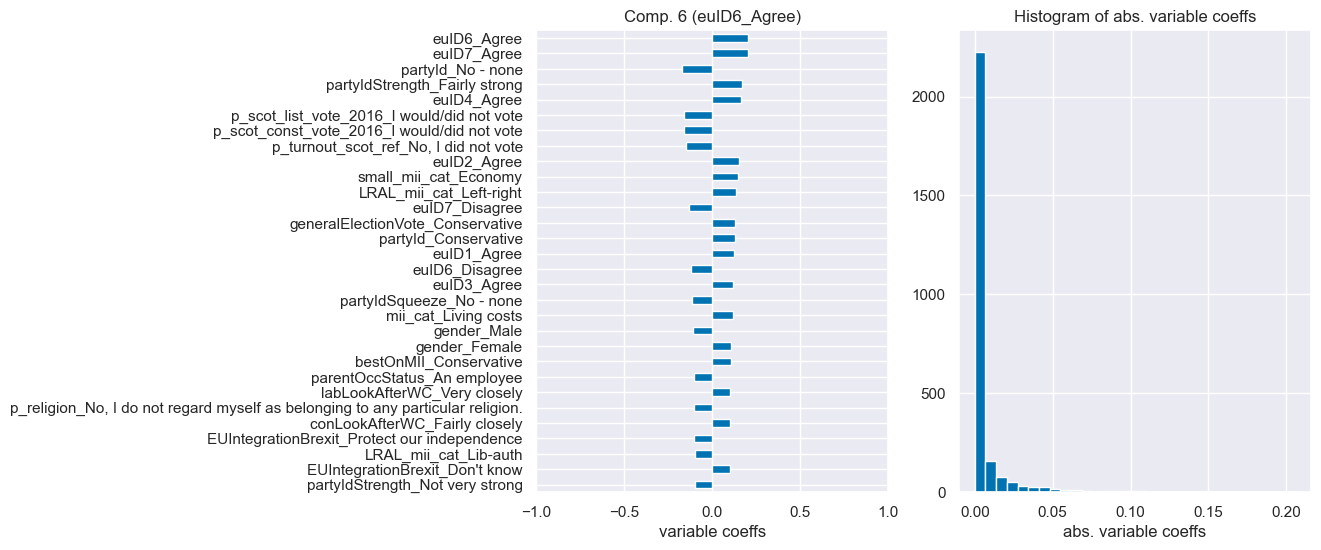

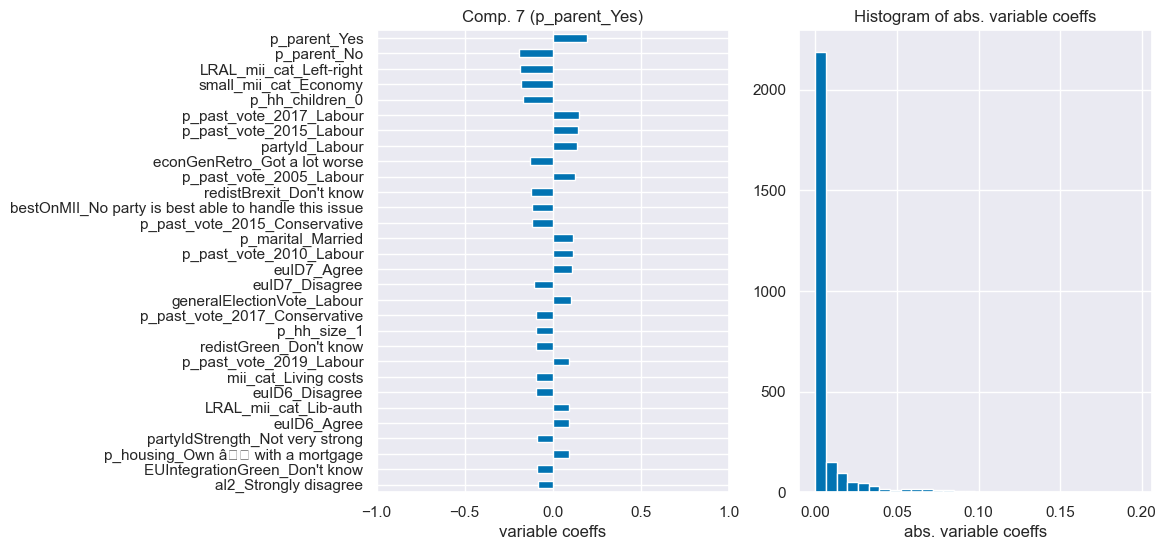

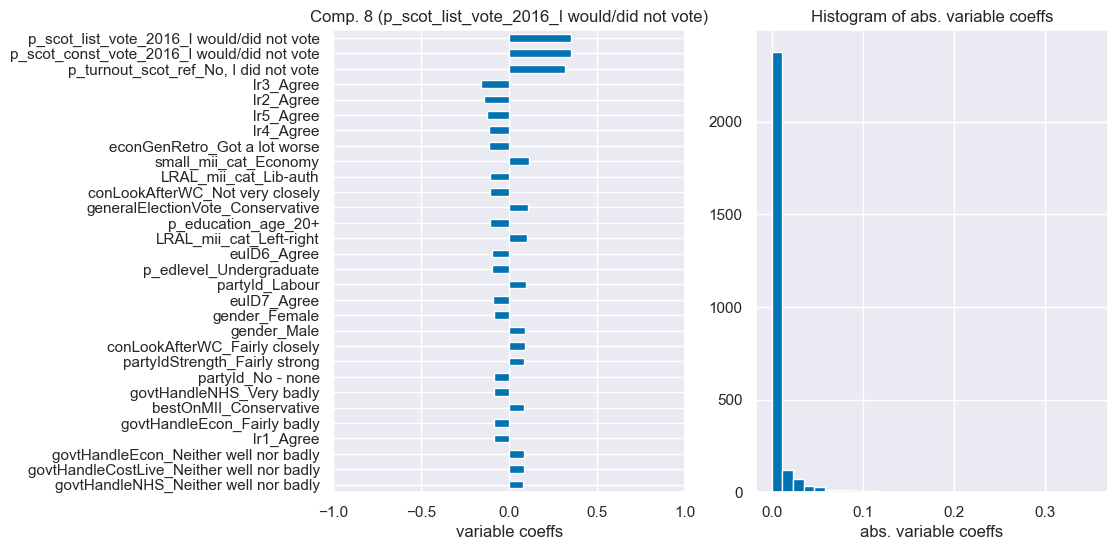

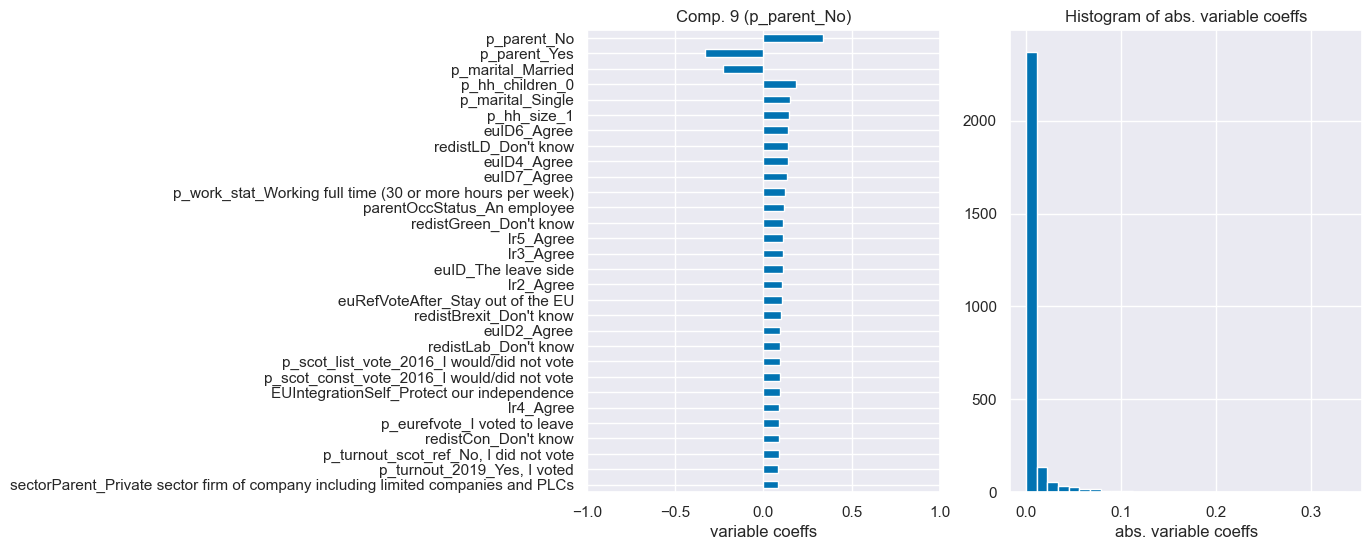

In [6]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

In [ ]:
# W24
# like(Sunak|JohnsonFormer|TrussFormer)

Top 20 positive (spearman) correlations for likeSunak r p N 
 
 generalElectionVote_Conservative 
 0.480000 
 0.00 
 12422 
 
 
 partyId_Conservative 
 0.450000 
 0.00 
 12422 
 
 
 bestOnMII_Conservative 
 0.400000 
 0.00 
 12422 
 
 
 p_past_vote_2017_Conservative 
 0.380000 
 0.00 
 12422 
 
 
 p_past_vote_2019_Conservative 
 0.370000 
 0.00 
 12422 
 
 
 p_past_vote_2015_Conservative 
 0.360000 
 0.00 
 12422 
 
 
 conLookAfterWC_Fairly closely 
 0.350000 
 0.00 
 12422 
 
 
 govtHandleCostLive_Neither well nor badly 
 0.330000 
 0.00 
 12422 
 
 
 govtHandleEcon_Neither well nor badly 
 0.310000 
 0.00 
 12422 
 
 
 govtHandleEcon_Fairly well 
 0.310000 
 0.00 
 12422 
 
 
 conLookAfterBA_Fairly closely 
 0.300000 
 0.00 
 12422 
 
 
 govtHandleNHS_Neither well nor badly 
 0.300000 
 0.00 
 12422 
 
 
 govtHandleCostLive_Fairly well 
 0.290000 
 0.00 
 12422 
 
 
 likeCon_8 
 0.280000 
 0.00 
 12422 
 
 
 p_past_vote_2010_Conservative 
 0.260000 
 0.00 
 12422 
 
 
 likeCon_7 
 0.250000 
 0.00 
 12422 
 
 
 p_past_vote_2005_Conservative 
 0.240000 
 0.00 
 12422 
 
 
 govtHandleNHS_Fairly well 
 0.230000 
 0.00 
 12422 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.220000 
 0.00 
 12422 
 
 
 likeCon_Strongly like 
 0.210000 
 0.00 
 12422 
 
 Top 20 negative (spearman) correlations for likeSunak r p N 
 
 likeCon_Strongly dislike 
 -0.590000 
 0.00 
 12422 
 
 
 govtHandleCostLive_Very badly 
 -0.540000 
 0.00 
 12422 
 
 
 govtHandleEcon_Very badly 
 -0.540000 
 0.00 
 12422 
 
 
 govtHandleNHS_Very badly 
 -0.510000 
 0.00 
 12422 
 
 
 likeJohnsonFormer_Strongly dislike 
 -0.500000 
 0.00 
 12422 
 
 
 conLookAfterWC_Not at all closely 
 -0.470000 
 0.00 
 12422 
 
 
 lr4_Strongly agree 
 -0.380000 
 0.00 
 12422 
 
 
 conLookAfterBA_Not at all closely 
 -0.370000 
 0.00 
 12422 
 
 
 likeTrussFormer_Strongly dislike 
 -0.360000 
 0.00 
 12422 
 
 
 lr3_Strongly agree 
 -0.360000 
 0.00 
 12422 
 
 
 lr2_Strongly agree 
 -0.340000 
 0.00 
 12422 
 
 
 redistCon_Government should be less concerned[...] 
 -0.320000 
 0.00 
 12422 
 
 
 generalElectionVote_Labour 
 -0.310000 
 0.00 
 12422 
 
 
 p_past_vote_2019_Labour 
 -0.310000 
 0.00 
 12422 
 
 
 lr1_Strongly agree 
 -0.300000 
 0.00 
 12422 
 
 
 bestOnMII_Labour 
 -0.290000 
 0.00 
 12422 
 
 
 redistSelf_Government should try to make incomes[...] 
 -0.280000 
 0.00 
 12422 
 
 
 partyId_Labour 
 -0.270000 
 0.00 
 12422 
 
 
 p_past_vote_2017_Labour 
 -0.270000 
 0.00 
 12422 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 -0.250000 
 0.00 
 12422

MSE: 3.04, MAE: 1.32, EV: 0.63, R2: 0.63


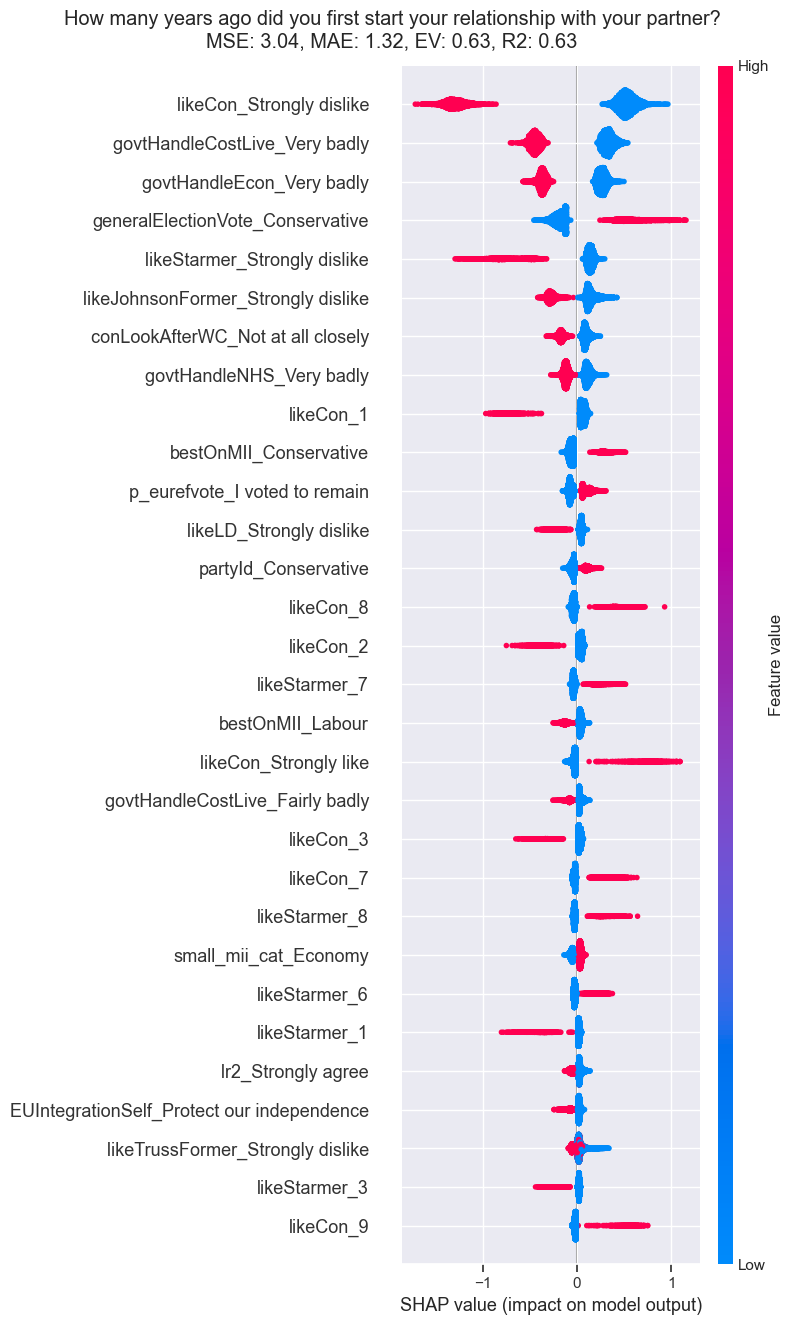

In [7]:
# likeSunak
name="likeSunak"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for likeJohnsonFormer r p N 
 
 p_past_vote_2019_Conservative 
 0.570000 
 0.00 
 12757 
 
 
 likeSunak 
 0.530000 
 0.00 
 12319 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.520000 
 0.00 
 12757 
 
 
 partyId_Conservative 
 0.510000 
 0.00 
 12757 
 
 
 euID_The leave side 
 0.500000 
 0.00 
 12757 
 
 
 generalElectionVote_Conservative 
 0.490000 
 0.00 
 12757 
 
 
 p_past_vote_2017_Conservative 
 0.480000 
 0.00 
 12757 
 
 
 p_eurefvote_I voted to leave 
 0.430000 
 0.00 
 12757 
 
 
 EUIntegrationSelf_Protect our independence 
 0.410000 
 0.00 
 12757 
 
 
 bestOnMII_Conservative 
 0.380000 
 0.00 
 12757 
 
 
 conLookAfterWC_Fairly closely 
 0.350000 
 0.00 
 12757 
 
 
 conLookAfterBA_Fairly closely 
 0.340000 
 0.00 
 12757 
 
 
 p_past_vote_2015_Conservative 
 0.340000 
 0.00 
 12757 
 
 
 govtHandleNHS_Neither well nor badly 
 0.330000 
 0.00 
 12757 
 
 
 p_past_vote_2010_Conservative 
 0.310000 
 0.00 
 12757 
 
 
 govtHandleEcon_Neither well nor badly 
 0.300000 
 0.00 
 12757 
 
 
 likeCon_8 
 0.290000 
 0.00 
 12757 
 
 
 govtHandleEcon_Fairly well 
 0.290000 
 0.00 
 12757 
 
 
 govtHandleCostLive_Neither well nor badly 
 0.290000 
 0.00 
 12757 
 
 
 p_past_vote_2005_Conservative 
 0.290000 
 0.00 
 12757 
 
 Top 20 negative (spearman) correlations for likeJohnsonFormer r p N 
 
 likeCon_Strongly dislike 
 -0.590000 
 0.00 
 12757 
 
 
 govtHandleNHS_Very badly 
 -0.510000 
 0.00 
 12757 
 
 
 euRefVoteAfter_Rejoin the EU 
 -0.500000 
 0.00 
 12757 
 
 
 govtHandleEcon_Very badly 
 -0.490000 
 0.00 
 12757 
 
 
 euID_The remain side 
 -0.480000 
 0.00 
 12757 
 
 
 govtHandleCostLive_Very badly 
 -0.460000 
 0.00 
 12757 
 
 
 generalElectionVote_Labour 
 -0.450000 
 0.00 
 12757 
 
 
 conLookAfterWC_Not at all closely 
 -0.450000 
 0.00 
 12757 
 
 
 p_past_vote_2019_Labour 
 -0.440000 
 0.00 
 12757 
 
 
 likeTrussFormer_Strongly dislike 
 -0.430000 
 0.00 
 12757 
 
 
 conLookAfterBA_Not at all closely 
 -0.420000 
 0.00 
 12757 
 
 
 bestOnMII_Labour 
 -0.390000 
 0.00 
 12757 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 -0.380000 
 0.00 
 12757 
 
 
 p_eurefvote_I voted to remain 
 -0.380000 
 0.00 
 12757 
 
 
 p_past_vote_2017_Labour 
 -0.370000 
 0.00 
 12757 
 
 
 redistCon_Government should be less concerned[...] 
 -0.370000 
 0.00 
 12757 
 
 
 partyId_Labour 
 -0.360000 
 0.00 
 12757 
 
 
 likeSunak_Strongly dislike 
 -0.320000 
 0.00 
 12757 
 
 
 al2_Strongly disagree 
 -0.310000 
 0.00 
 12757 
 
 
 lr4_Strongly agree 
 -0.310000 
 0.00 
 12757

MSE: 4.18, MAE: 1.47, EV: 0.67, R2: 0.67


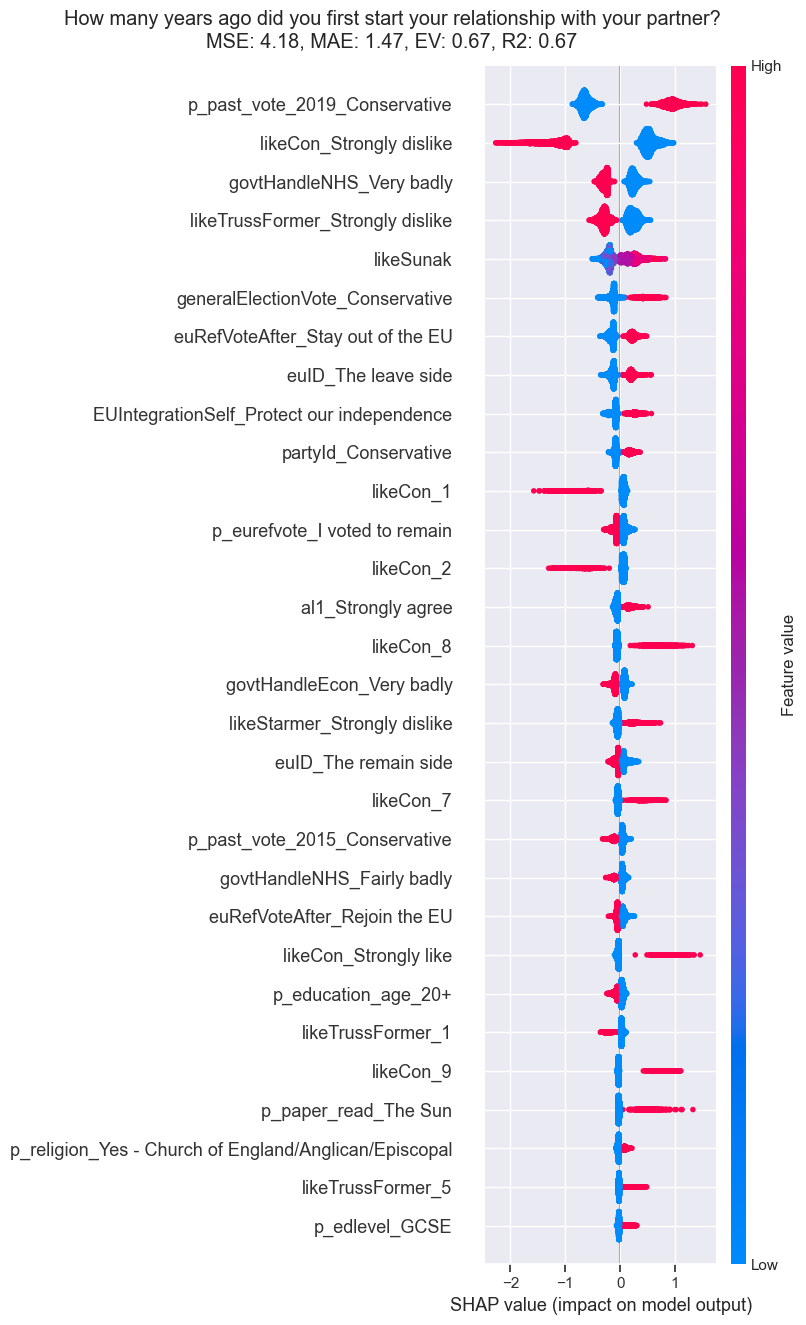

In [8]:
# likeJohnsonFormer
name="likeJohnsonFormer"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for likeTrussFormer r p N 
 
 likeJohnsonFormer 
 0.490000 
 0.00 
 12449 
 
 
 likeSunak 
 0.370000 
 0.00 
 12168 
 
 
 p_past_vote_2019_Conservative 
 0.300000 
 0.00 
 12517 
 
 
 partyId_Conservative 
 0.290000 
 0.00 
 12517 
 
 
 p_past_vote_2017_Conservative 
 0.280000 
 0.00 
 12517 
 
 
 generalElectionVote_Conservative 
 0.270000 
 0.00 
 12517 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.260000 
 0.00 
 12517 
 
 
 euID_The leave side 
 0.240000 
 0.00 
 12517 
 
 
 govtHandleNHS_Neither well nor badly 
 0.240000 
 0.00 
 12517 
 
 
 conLookAfterWC_Fairly closely 
 0.230000 
 0.00 
 12517 
 
 
 govtHandleEcon_Neither well nor badly 
 0.220000 
 0.00 
 12517 
 
 
 govtHandleCostLive_Neither well nor badly 
 0.220000 
 0.00 
 12517 
 
 
 p_past_vote_2015_Conservative 
 0.220000 
 0.00 
 12517 
 
 
 bestOnMII_Conservative 
 0.200000 
 0.00 
 12517 
 
 
 conLookAfterBA_Fairly closely 
 0.200000 
 0.00 
 12517 
 
 
 p_past_vote_2010_Conservative 
 0.190000 
 0.00 
 12517 
 
 
 p_eurefvote_I voted to leave 
 0.180000 
 0.00 
 12517 
 
 
 econGenRetro_Got a little worse 
 0.180000 
 0.00 
 12517 
 
 
 p_past_vote_2005_Conservative 
 0.180000 
 0.00 
 12517 
 
 
 lr3_Neither agree nor disagree 
 0.170000 
 0.00 
 12517 
 
 Top 20 negative (spearman) correlations for likeTrussFormer r p N 
 
 likeJohnsonFormer_Strongly dislike 
 -0.490000 
 0.00 
 12517 
 
 
 likeCon_Strongly dislike 
 -0.440000 
 0.00 
 12517 
 
 
 govtHandleNHS_Very badly 
 -0.390000 
 0.00 
 12517 
 
 
 govtHandleEcon_Very badly 
 -0.390000 
 0.00 
 12517 
 
 
 govtHandleCostLive_Very badly 
 -0.360000 
 0.00 
 12517 
 
 
 conLookAfterWC_Not at all closely 
 -0.340000 
 0.00 
 12517 
 
 
 likeSunak_Strongly dislike 
 -0.310000 
 0.00 
 12517 
 
 
 conLookAfterBA_Not at all closely 
 -0.300000 
 0.00 
 12517 
 
 
 lr4_Strongly agree 
 -0.270000 
 0.00 
 12517 
 
 
 euRefVoteAfter_Rejoin the EU 
 -0.270000 
 0.00 
 12517 
 
 
 generalElectionVote_Labour 
 -0.270000 
 0.00 
 12517 
 
 
 redistCon_Government should be less concerned[...] 
 -0.270000 
 0.00 
 12517 
 
 
 lr3_Strongly agree 
 -0.260000 
 0.00 
 12517 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 -0.250000 
 0.00 
 12517 
 
 
 p_past_vote_2019_Labour 
 -0.240000 
 0.00 
 12517 
 
 
 bestOnMII_Labour 
 -0.240000 
 0.00 
 12517 
 
 
 lr2_Strongly agree 
 -0.230000 
 0.00 
 12517 
 
 
 EUIntegrationCon_Protect our independence 
 -0.230000 
 0.00 
 12517 
 
 
 econGenRetro_Got a lot worse 
 -0.230000 
 0.00 
 12517 
 
 
 euID_The remain side 
 -0.230000 
 0.00 
 12517

MSE: 3.29, MAE: 1.35, EV: 0.33, R2: 0.33


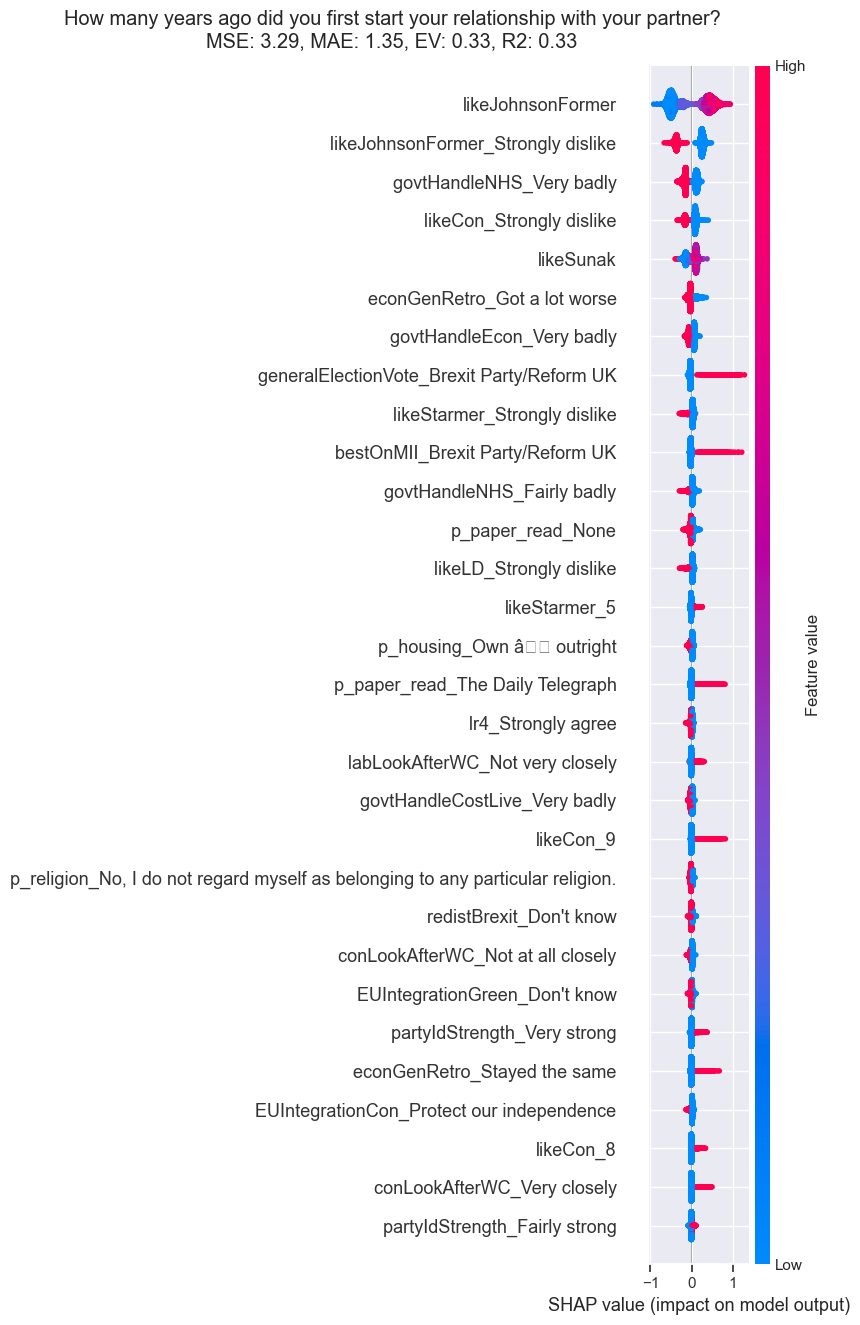

In [9]:
# likeTrussFormer
name="likeTrussFormer"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)